# Aprendizaje Supervisado - Clasificación

## Regresión Logística

### Univariable

In [ ]:
#IMPORTAR LIBRERÍAS
#Tratamiento de datos
import pandas as pd
import numpy as np

#Gráficos
import matplotlib.pyplot as plt
import seaborn as sb

#Procesado y modelado
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

#Advertencias
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#Configurar gráficos
plt.style.use('ggplot')

In [ ]:
#Problema: Identificar si un estudiante es merecedor de matrícula de honor a partir de sus notas de matemáticas
matricula = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1,
                     0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,
                     0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
                     0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
                     1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,
                     1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
                     1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
                     0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
                     0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
                     0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0,
                     0, 0, 0, 0, 1, 0, 0, 0, 1, 1])
matematicas = np.array([41, 53, 54, 47, 57, 51, 42, 45, 54, 52, 51, 51, 71, 57, 50, 43,
                  51, 60, 62, 57, 35, 75, 45, 57, 45, 46, 66, 57, 49, 49, 57, 64,
                  63, 57, 50, 58, 75, 68, 44, 40, 41, 62, 57, 43, 48, 63, 39, 70,
                  63, 59, 61, 38, 61, 49, 73, 44, 42, 39, 55, 52, 45, 61, 39, 41,
                  50, 40, 60, 47, 59, 49, 46, 58, 71, 58, 46, 43, 54, 56, 46, 54,
                  57, 54, 71, 48, 40, 64, 51, 39, 40, 61, 66, 49, 65, 52, 46, 61,
                  72, 71, 40, 69, 64, 56, 49, 54, 53, 66, 67, 40, 46, 69, 40, 41,
                  57, 58, 57, 37, 55, 62, 64, 40, 50, 46, 53, 52, 45, 56, 45, 54,
                  56, 41, 54, 72, 56, 47, 49, 60, 54, 55, 33, 49, 43, 50, 52, 48,
                  58, 43, 41, 43, 46, 44, 43, 61, 40, 49, 56, 61, 50, 51, 42, 67,
                  53, 50, 51, 72, 48, 40, 53, 39, 63, 51, 45, 39, 42, 62, 44, 65,
                  63, 54, 45, 60, 49, 48, 57, 55, 66, 64, 55, 42, 56, 53, 41, 42,
                  53, 42, 60, 52, 38, 57, 58, 65])

Realizamos una breve exploración de los datos

In [ ]:
datos = pd.DataFrame({'Matricula':matricula, 'Matematicas':matematicas})
datos.head()

,Matricula,Matematicas
0,0,41
1,0,53
2,0,54
3,0,47
4,0,57


Tal como se habló en clases anteriores, es sumamente importante no tener muestras desbalanceadas, pues esto puede traer problemas en la sección de entrenamiento o prueba.

In [ ]:
datos.Matricula.value_counts().sort_index()

0    151
1     49
Name: Matricula, dtype: int64

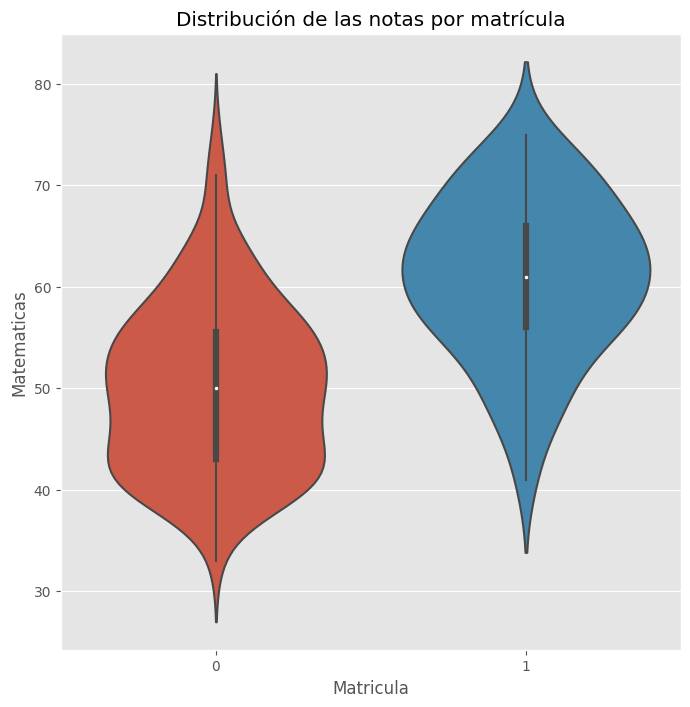

In [ ]:
#Gráfico de violines
fig, ax = plt.subplots(figsize = (8,8))
sb.violinplot(x = 'Matricula',
             y = 'Matematicas',
             data = datos,
             ax = ax)
ax.set_title('Distribución de las notas por matrícula')
plt.show()

Siempre que se construya un modelo de estos, es importante separar sus datos en conjuntos de prueba y entrenamiento.

In [ ]:
#Ajuste del modelo
X = datos[['Matematicas']]
y = datos[['Matricula']]

XEntrenamiento, XPrueba, yEntrenamiento, yPrueba = train_test_split(X, y, train_size = 0.7, random_state = 123)

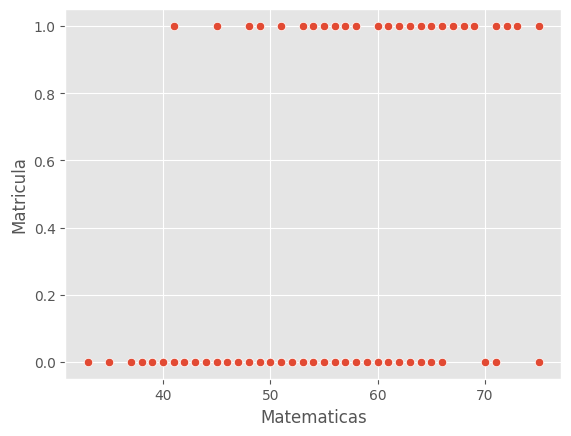

In [ ]:
sb.scatterplot(data = datos, x = 'Matematicas', y = 'Matricula')
plt.show()

Ahora entrenamos el algoritmo.

In [ ]:
modelo = LogisticRegression()
modelo.fit(XEntrenamiento, yEntrenamiento)

LogisticRegression()

In [ ]:
print('Intercepto: ', modelo.intercept_)
print('Coeficiente: ', list(zip(X.columns, modelo.coef_.flatten())))

Intercepto:  [-9.5220931]
Coeficiente:  [('Matematicas', 0.15251143403094547)]


Una vez entrenado, se somete entonces a los datos de prueba.

In [ ]:
predEnt = modelo.predict(XEntrenamiento)
accuracyEnt = accuracy_score(yEntrenamiento, predEnt)
accuracyEnt

0.8142857142857143

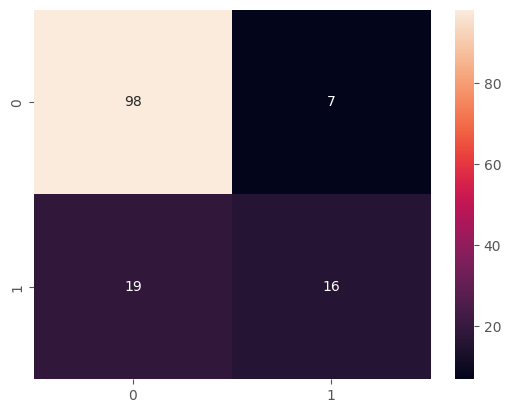

In [ ]:
matrizEnt = confusion_matrix(yEntrenamiento, predEnt)
sb.heatmap(matrizEnt, annot = True)
plt.show()

In [ ]:
predPrueba = modelo.predict(XPrueba)

In [ ]:
accuracyPrueba = accuracy_score(yPrueba, predPrueba)
accuracyPrueba

0.8

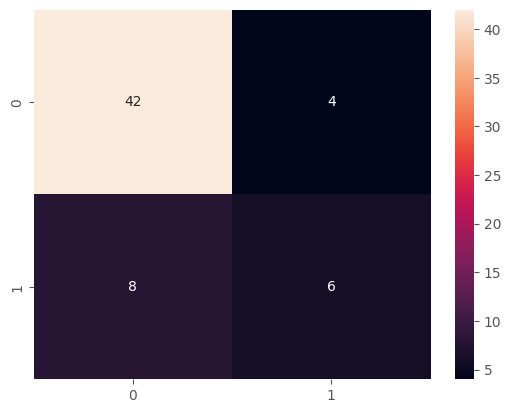

In [ ]:
matrizPrueba = confusion_matrix(yPrueba, predPrueba)
sb.heatmap(matrizPrueba, annot = True)
plt.show()

### Multivariable

Este problema es igual que el anterior, con la única diferencia de que en este caso, existen múltiples variables explicativas para el modelo.

In [ ]:
#IMPORTAR DATOS
url = 'https://raw.githubusercontent.com/JoaquinAmatRodrigo/' + 'Estadistica-machine-learning-python/master/data/spam.csv'
datos = pd.read_csv(url)
datos.head()

,make,address,all,num3d,our,over,remove,internet,order,mail,...,charSemicolon,charRoundbracket,charSquarebracket,charExclamation,charDollar,charHash,capitalAve,capitalLong,capitalTotal,type
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,spam
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,spam
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,spam
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,spam
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,spam


Sumamente importante el cambiar el tipo de dato de la salida; como se esperan 1's y 0's, se tienen qué cambiar las variables categóricas para que estas pasen a ser numéricas.

In [ ]:
datos['type'] = np.where(datos['type'] == 'spam', 1, 0)
print('Número de observaciones por clase')
print(datos['type'].value_counts())
print('')
print('Relación de clases')
print(100 * datos['type'].value_counts(normalize = True))

Número de observaciones por clase
0    2788
1    1813
Name: type, dtype: int64

Relación de clases
0    60.595523
1    39.404477
Name: type, dtype: float64


In [ ]:
X = datos.drop(columns = 'type')
y = datos['type']

In [ ]:
XEntrenamiento, XPrueba, yEntrenamiento, yPrueba = train_test_split(X, y, train_size = 0.7, random_state = 123)

In [ ]:
modelo = LogisticRegression()
modelo.fit(XEntrenamiento, yEntrenamiento)

LogisticRegression()

Aunque el problema sea multivariable, no existen alteraciones en lo que a salidas y rendimientos respecta; no obstante, importante entender que no todas las variables tendrán la misma importancia a la hora de explicar o definir la salida.

In [ ]:
predEntrenamiento = modelo.predict(XEntrenamiento)
accuracyEntrenamiento = accuracy_score(yEntrenamiento, predEntrenamiento)
print(f'{accuracyEntrenamiento * 100} %')

92.36024844720497 %


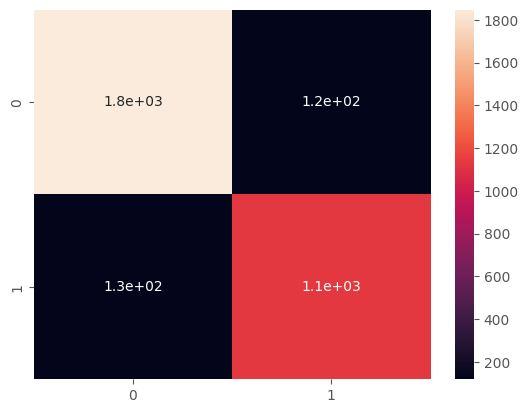

In [ ]:
matrizEntrenamiento = confusion_matrix(yEntrenamiento, predEntrenamiento)
sb.heatmap(matrizEntrenamiento, annot = True)
plt.show()

In [ ]:
predPrueba = modelo.predict(XPrueba)
accuracyPrueba = accuracy_score(yPrueba, predPrueba)
print(f'{accuracyPrueba * 100} %')

92.39681390296887 %


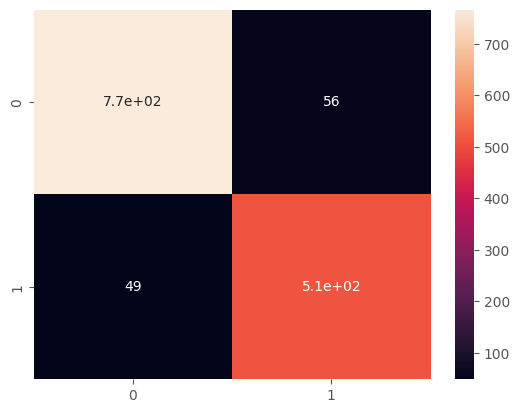

In [ ]:
matrizPrueba = confusion_matrix(yPrueba, predPrueba)
sb.heatmap(matrizPrueba, annot = True)
plt.show()

## Árboles de Decisión

Otro ejemplo de problema, esta vez usando otra técnica de clasificación: El árbol de decisión.

In [ ]:
###IMPORTAR LIBRERÍAS
#Tratamiento de datos
import numpy as np
import pandas as pd

#Gráficos
import matplotlib.pyplot as plt
import seaborn as sb

#Modelado
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.tree import export_graphviz
from sklearn.tree import export_text

#Preparación
from sklearn.model_selection import train_test_split

#Evaluación
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

In [ ]:
iris = datasets.load_iris(as_frame = True)
iris.data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


Nuevamente, tenemos datos referentes al tamaño de los sépalos y los pétalos en las flores.

In [ ]:
iris.target

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: target, Length: 150, dtype: int64

In [ ]:
X = iris.data
y = iris.target

In [ ]:
X.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


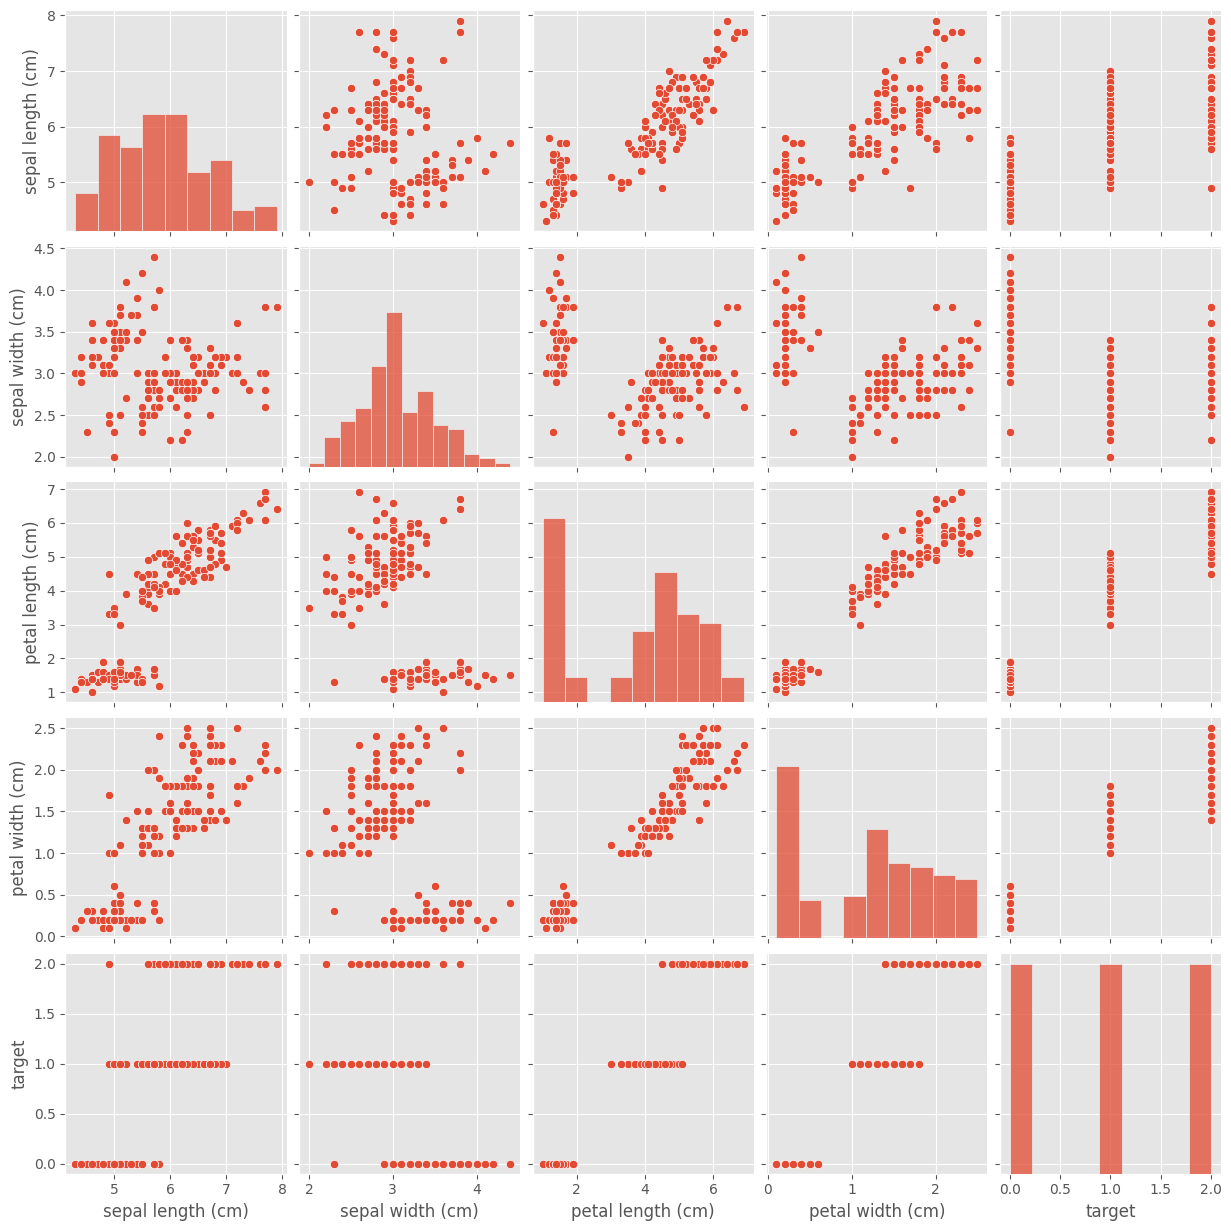

In [ ]:
sb.pairplot(iris.frame, kind = 'scatter')
plt.show()

In [ ]:
xEntrenamiento, xPrueba, yEntrenamiento, yPrueba = train_test_split(X, y, train_size = 0.7, random_state = 123)
modelo = DecisionTreeClassifier(max_depth = 5, random_state =123)
modelo.fit(xEntrenamiento, yEntrenamiento)

Profundidad del árbol: 5
Númrero de nodos terminales: 8


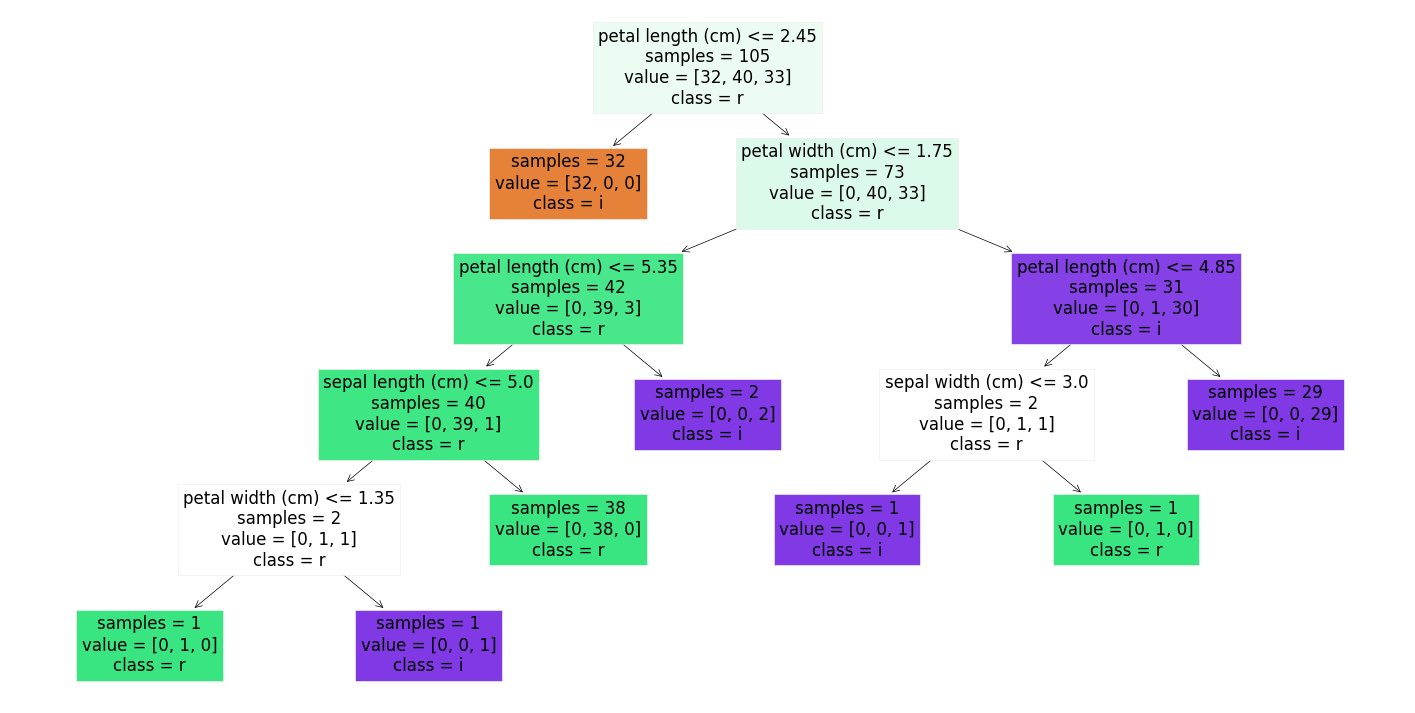

In [ ]:
fig, ax = plt.subplots(figsize = (18,9))
print(f'Profundidad del árbol: {modelo.get_depth()}')
print(f'Númrero de nodos terminales: {modelo.get_n_leaves()}')

plot = plot_tree(decision_tree = modelo,
                feature_names = X.columns.tolist(),
                class_names = 'iris',
                filled = True,
                impurity = False,
                fontsize = 12,
                ax = ax)

Lo que hace internamente este modelo es sopesar y entregar valores de peso e importancia a las diferentes variables, para convertirlas en salidas dicotómicas (de dos valores). En otras palabras, a través de una serie de reglas duras, podrá entregar una respuesta.

In [ ]:
predEntrenamiento = modelo.predict(xEntrenamiento)
predPrueba = modelo.predict(xPrueba)

In [ ]:
accuracyEntrenamiento = accuracy_score(yEntrenamiento, predEntrenamiento)
f1Entrenamiento = f1_score(yEntrenamiento, predEntrenamiento, average = 'micro')
print(f'El desempeño en entrenamiento es: {accuracyEntrenamiento}')
print(f'El F1 Score en entrenamiento es: {f1Entrenamiento}')

El desempeño en entrenamiento es: 1.0
El F1 Score en entrenamiento es: 1.0


<Axes: >

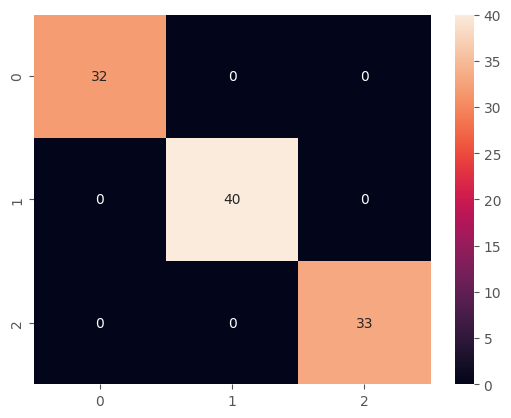

In [ ]:
matrizEntrenamiento = confusion_matrix(yEntrenamiento, predEntrenamiento)
sb.heatmap(matrizEntrenamiento, annot = True)

In [ ]:
accuracyPrueba = accuracy_score(yPrueba, predPrueba)
f1Prueba = f1_score(yPrueba, predPrueba, average = 'micro')
print(f'El desempeño en entrenamiento es: {accuracyPrueba}')
print(f'El F1 Score en entrenamiento es: {f1Prueba}')

El desempeño en entrenamiento es: 0.9555555555555556
El F1 Score en entrenamiento es: 0.9555555555555556


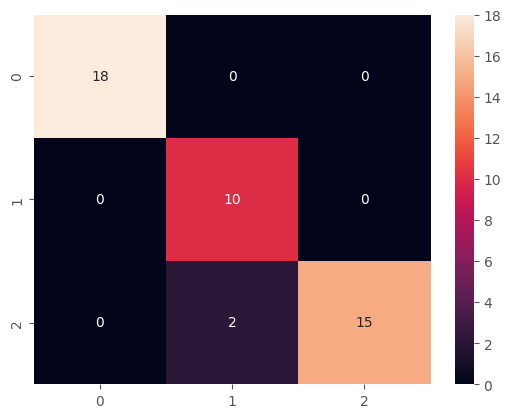

In [ ]:
matrizPrueba = confusion_matrix(yPrueba, predPrueba)
sb.heatmap(matrizPrueba, annot = True)
plt.show()

Nota: Aunque en este caso pareciera que el árbol de decisión es un modelo casi infalible, no se recomienda "casarse" con algún algoritmo, ya que por capacidades de procesamiento, e incluso por el tipo de problema, diferentes soluciones pueden entregar diferentes salidas, y esto es sumamente importante para tener en cuenta.